# SAS and Python Basics
This notebook will get you started with accessing SAS using Python.

---
## Prerequisites
We assume you are using **SAS OnDemand for Academics (ODA)** as your SAS backend.  If you haven't done so, you will first need to register for an free **ODA** account by following these instructions: https://support.sas.com/ondemand/steps.html

Once you have authenticated to **ODA**, follow the instructions under [SASPy access to SAS® hosted servers](https://support.sas.com/ondemand/saspy.html) to configure your Python environment to access the ODA SAS server.

We will be using Python 3.6 or later.  If you don't have a Python environment setup, [Anaconda](https://www.anaconda.com/products/individual) is an excellent choice to get started.

---
## References:
* Examples on GitHub: https://github.com/sassoftware/saspy-examples 
* Documentation: https://sassoftware.github.io/saspy/
* PyPI page: https://pypi.org/project/saspy/

---
## Import Python Libraries
The Python ***import*** statement is responsible for loading libraries that you will be using in your program. 

There are two basic ways of importing libraries:
1. Using the ***import*** statement without a ***from***:\
    ```import pandas as pd```
    1. find a module, loading and initializing it if necessary
    1. define a name or names in the local namespace for the scope where the import statement occurs.
1. Using a ***from*** statement with ***import***:\
    ```from IPython.display import HTML```
    1. find the module specified in the from clause, loading and initializing it if necessary;
    1. for each of the identifiers specified in the import clauses:
        1. check if the imported module has an attribute by that name
        1. if not, attempt to import a submodule with that name and then check the imported module again for that attribute
        1. if the attribute is not found, ImportError is raised.
        1. otherwise, a reference to that value is stored in the local namespace, using the name in the ***as*** clause if it is present, otherwise using the attribute name


    

A **module** is a Python package that has been installed with **pip** or **conda**\
The **as** statement provides an alternative name or "alias" so you can type **pd** rather than **pandas** in your code.

In [1]:
# Standard imports need to execute before your code.
import saspy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML

In [2]:
saspy.__path__

['/home/dowenk/anaconda3/envs/SAS/lib/python3.8/site-packages/saspy']

---
## SAS Server or Local Execution?

### There are two ways to work with data and algorithms:

1. Keep data on the SAS server and work with the data remotely.
    * In this method data stays on the SAS server, although logs and listings may be returned to your Python session.
    * Data manipulation and analytic algorithms are running remotely on the SAS Server.
    * Although your SAS server may be on the same server running Python, we are still referring to this as a "remote" server.
2. Pull data onto your Python client machine and work with the data locally.
    * With this method, data is pulled into your Python session.
    * You can then manipulate and analyse the data using Python libraries and code you write.  

**NOTE: In reality you may be using a combination of remote and local data manipulation and analysis to get the job done.**

### Create a SAS session object
This will establish a connection with the SAS ODA backend.\
We only need to do this once, until you close the Notebook or otherwise shutdown your Python session. 

In [2]:
# the 'sas' variable created here is your handle to the SAS backend
sas = saspy.SASsession(cfgname="oda", results='HTML')

SAS Connection established. Subprocess id is 21076



In [3]:
# this will show you where your sascfg_personal.py is located
saspy.SAScfg

'/Users/dowenk/opt/anaconda3/envs/SAS/lib/python3.8/site-packages/saspy/sascfg_personal.py'

### Create a SASdata object called myclass *pointing* to SASHELP.MYCLASS

In [4]:
help_class = sas.sasdata('class', 'sashelp')

### What can you do with a SASdata object?  
* Use the '?' prefix to see the documentation.
* Use the '??' prefix to see the Python source code.

In [ ]:
# get the python source code for the sasdata class
??help_class

In [ ]:
# get help for sasdata class
?help_class

### Print the data

In [8]:
help_class.head(obs=6)

In [9]:
help_class.tail(obs=4)

### Explore your data

In [10]:
help_class.columnInfo()

In [11]:
help_class.describe()


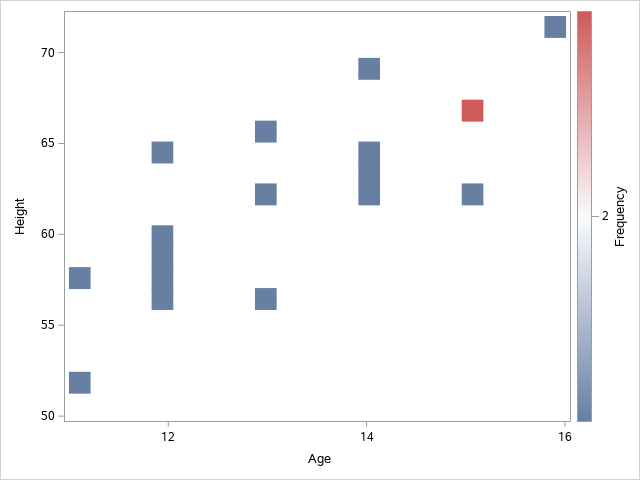

In [12]:
help_class.heatmap("Age", 'Height')


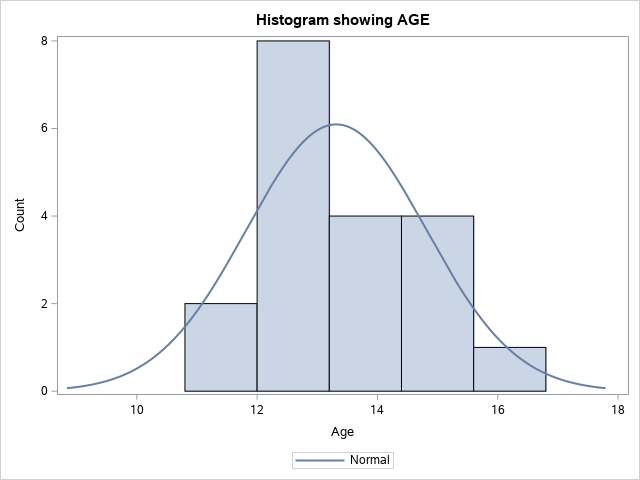


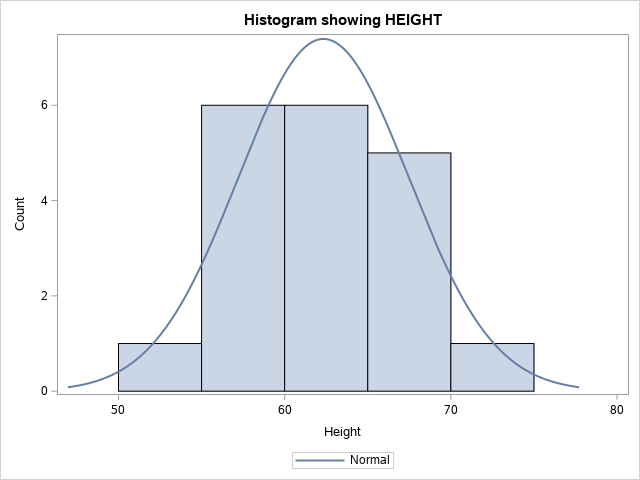


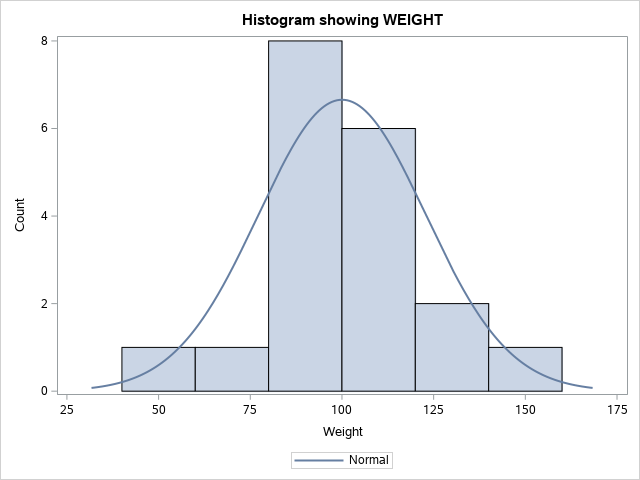

In [13]:
for col in ['Age', 'Height', 'Weight']:
    help_class.hist(col, title='Histogram showing ' + col.upper())

---
### Submitting SAS Code
Use SAS Studio to create a new folder called ~/mylib.  This is where I will make a copy of the sashelp.class data set to work with.

In [ ]:
code = """
    libname mylib '~/mylib';
    data mylib.class;
        set sashelp.class;
    run;
 
    proc print data = mylib.class;
    run;
"""
results = sas.submit(code)
results

In [23]:
HTML(results['LST'])

In [18]:
print(results['LOG'])

51                                                         The SAS System                   Wednesday, February 10, 2021 12:07:00 AM

302        ods listing close;ods html5 (id=saspy_internal) file=_tomods1 options(bitmap_mode='inline') device=svg style=HTMLBlue;
302      ! ods graphics on / outputfmt=png;
303        
304        
305            libname mylib '~/mylib';
306            data mylib.class;
307                set sashelp.class;
308            run;
309        
310            proc print data = mylib.class;
311            run;
312        
313        
314        
315        ods html5 (id=saspy_internal) close;ods listing;
316        
52                                                         The SAS System                   Wednesday, February 10, 2021 12:07:00 AM

317        


In [20]:
sas.datasets('mylib')

In [ ]:
print(sas.saslog())

In [24]:
sas.assigned_librefs()

['WORK',
 'MYLIB',
 'SASDATA',
 'STPSAMP',
 'SASHELP',
 'MAPS',
 'MAPSSAS',
 'MAPSGFK',
 'SASUSER']

In [25]:
for libref in sas.assigned_librefs():
    print(f'this libref is called "{libref}"')

this libref is called "WORK"
this libref is called "MYLIB"
this libref is called "SASDATA"
this libref is called "STPSAMP"
this libref is called "SASHELP"
this libref is called "MAPS"
this libref is called "MAPSSAS"
this libref is called "MAPSGFK"
this libref is called "SASUSER"


---
### Using prompts to get user input for macro variables.

In [ ]:
code = '''
data &dsname; 
    user="&user"; 
    hidden="&pw"; 
run; 
proc print data=&dsname;
run;
'''

results = sas.submit(code, prompt={'user': False, 'pw': True, 'dsname': False})

In [ ]:
HTML(ll['LST'])

---
### Edit a Data Set
Now I can create a new SASData object called my_class to work with.  Remember, we are still executing programs against this data remotely using the SAS ODA server.

In this example, we are defining two new rows we would like to add to the mylib.class data set and then appending those using the append() method. The SAS data set stays on the ODA Server.

In [ ]:
my_class = sas.sasdata('class', 'mylib')
new_data = pd.DataFrame({'Name': ['Michelle', 'Frank'], 
                         'Sex': ['F', 'M'], 
                         'Age': [14, 13], 
                         'Height': [70, 67], 
                         'Weight': [101, 98]})
my_class.append(new_data)
my_class.tail()

# Local Execution
In this section we will explore how to pull data out of and push data back into a SAS environment while working with your data mainly in your local Python enviornment. 

### Copy the class data to a local Pandas Data Frame

### Instantiate a new SASsession object.

In [ ]:
sas = saspy.SASsession(cfgname="oda")

### Create a DataFrame from the sashelp.class data set.  
<p/>Note: All of the data is coppied from SAS to the Python environment.

In [26]:
class_df = sas.sasdata('class', 'sashelp').to_df()

In [31]:
class_df.describe()

count        mean        std   min    25%   50%     75%    max
Age      19.0   13.315789   1.492672  11.0  12.00  13.0   14.50   16.0
Height   19.0   62.336842   5.127075  51.3  58.25  62.8   65.90   72.0
Weight   19.0  100.026316  22.773933  50.5  84.25  99.5  112.25  150.0

In [32]:
help_class.describe()

### Correlation Matrix

In [33]:
class_df.corr()

Age    Height    Weight
Age     1.000000  0.811434  0.740885
Height  0.811434  1.000000  0.877785
Weight  0.740885  0.877785  1.000000

### Frequency table

In [34]:
class_df.Age.value_counts()

12    5
14    4
15    4
13    3
11    2
16    1
Name: Age, dtype: int64

In [ ]:
class_df['Age'].value_counts()

### Crosstab

In [35]:
pd.crosstab(index=class_df["Sex"],
           columns=class_df["Age"],
           margins=True)

Age  11  12  13  14  15  16  All
Sex                             
F     1   2   2   2   2   0    9
M     1   3   1   2   2   1   10
All   2   5   3   4   4   1   19

### Similar to SAS FREQ procedure Executing on the SAS Server
Notice the difference in execution speed between running in the local Python environment and the remote SAS server.

In [36]:
code = """
    libname mylib '~/mylib';
    proc freq data=mylib.class;
        table Sex*Age;
    run;
"""

HTML(sas.submit(code)['LST'])